## Blatt 06 , Aufg 3

In [4]:
import numpy as np
from skimage.io import imread
from matplotlib import pyplot as plt

### Aufg 3.1

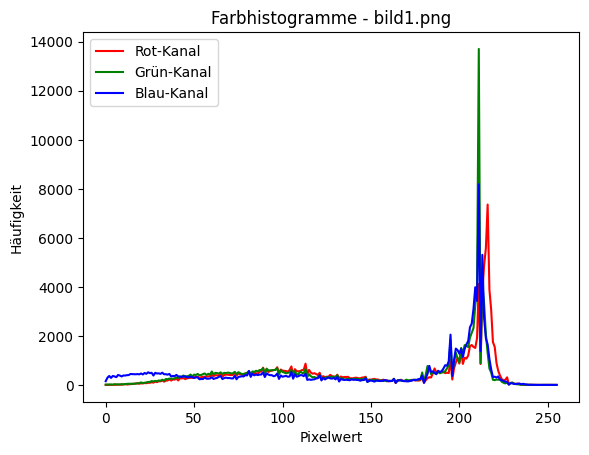

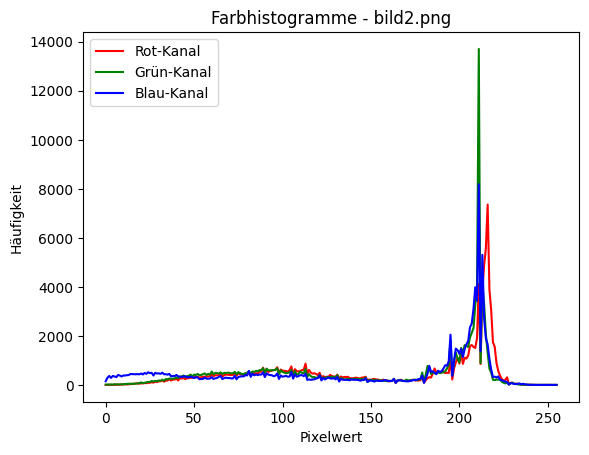

In [5]:


def calculate_color_histogram(image):
    # Aufteilen des Bildes in die einzelnen Farbkanäle
    red_channel = image[:, :, 0]
    green_channel = image[:, :, 1]
    blue_channel = image[:, :, 2]
    
    # Berechnung der Histogramme für jeden Farbkanal
    red_hist, red_bins = np.histogram(red_channel.flatten(), bins=256, range=[0, 256])
    green_hist, green_bins = np.histogram(green_channel.flatten(), bins=256, range=[0, 256])
    blue_hist, blue_bins = np.histogram(blue_channel.flatten(), bins=256, range=[0, 256])
    
    return red_hist, green_hist, blue_hist

# Laden der Bilder
image1 = imread('./bilder-Wk06/nebel.png')
image2 = imread('./bilder-Wk06/farbverlaeufe.png')

# Berechnung der Farbhistogramme für Bild 1
red_hist1, green_hist1, blue_hist1 = calculate_color_histogram(image1)

# Berechnung der Farbhistogramme für Bild 2
red_hist2, green_hist2, blue_hist2 = calculate_color_histogram(image2)

# Plotting der Farbhistogramme für Bild 1
plt.figure()
plt.plot(red_hist1, color='red', label='Rot-Kanal')
plt.plot(green_hist1, color='green', label='Grün-Kanal')
plt.plot(blue_hist1, color='blue', label='Blau-Kanal')
plt.title("Farbhistogramme - bild1.png")
plt.xlabel("Pixelwert")
plt.ylabel("Häufigkeit")
plt.legend()
plt.show()

# Plotting der Farbhistogramme für Bild 2
plt.figure()
plt.plot(red_hist2, color='red', label='Rot-Kanal')
plt.plot(green_hist2, color='green', label='Grün-Kanal')
plt.plot(blue_hist2, color='blue', label='Blau-Kanal')
plt.title("Farbhistogramme - bild2.png")
plt.xlabel("Pixelwert")
plt.ylabel("Häufigkeit")
plt.legend()
plt.show()


## Aufg 3.2 ; 1.Versuch

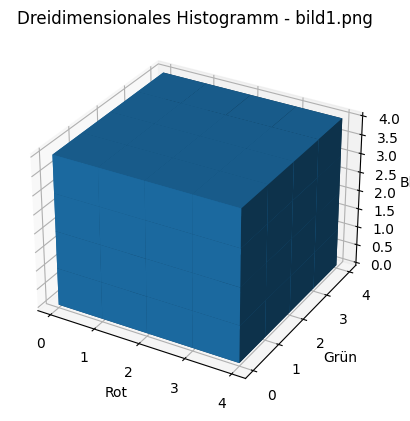

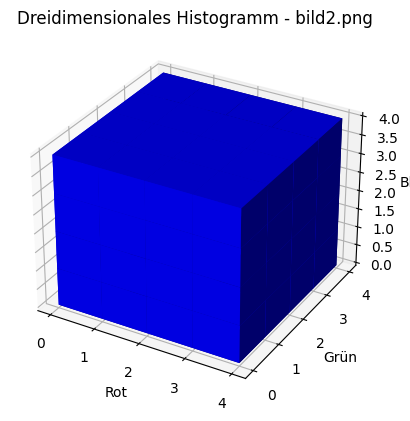

In [12]:


def calculate_3D_histogram(image):
    # Erstellen eines leeren dreidimensionalen Histogramms
    histogram_3d = np.zeros((4, 4, 4), dtype=np.int32)

    # Iteration über alle Pixel im Bild
    for row in image:
        for pixel in row:
            red, green, blue = pixel

            # Umwandlung der Farbwerte in Indizes für das Histogramm
            red_index = int(red / 64)
            green_index = int(green / 64)
            blue_index = int(blue / 64)

            # Inkrementieren des entsprechenden Behälters im Histogramm
            histogram_3d[red_index, green_index, blue_index] += 1

    return histogram_3d

# Laden der Bilder
image1 = imread('./bilder-Wk06/nebel.png')
image2 = imread('./bilder-Wk06/farbverlaeufe.png')

# Berechnung der dreidimensionalen Histogramme für Bild 1
histogram_3d_1 = calculate_3D_histogram(image1)

# Berechnung der dreidimensionalen Histogramme für Bild 2
histogram_3d_2 = calculate_3D_histogram(image2)

# Plotting des dreidimensionalen Histogramms für Bild 1
x = range(4)
y = range(4)
z = range(4)

# Erzeugung eines 3D-Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Erzeugung der Koordinaten für die Histogramm-Behälter
X, Y, Z = np.meshgrid(x, y, z)

# Flattening der Koordinaten und des Histogramms
x = X.flatten()
y = Y.flatten()
z = Z.flatten()
histogram = histogram_3d_1.flatten()

# Erzeugung des 3D-Barplots ##
ax.bar3d(x, y, z, dx=1, dy=1, dz=1, color=None,shade=True)

# Einstellung der Achsentitel
ax.set_xlabel('Rot')
ax.set_ylabel('Grün')
ax.set_zlabel('Blau')

# Anzeige des Plots
plt.title('Dreidimensionales Histogramm - bild1.png')
plt.show()

# Plotting des dreidimensionalen Histogramms für Bild 2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = range(4)
y = range(4)
z = range(4)

X, Y, Z = np.meshgrid(x, y, z)

x = X.flatten()
y = Y.flatten()
z = Z.flatten()
histogram = histogram_3d_2.flatten()

ax.bar3d(x, y, z, dx=1, dy=1, dz=1, color='b')

ax.set_xlabel('Rot')
ax.set_ylabel('Grün')
ax.set_zlabel('Blau')

plt.title('Dreidimensionales Histogramm - bild2.png')
plt.show()


## Aufg. 3.2 ; 2.Versuch

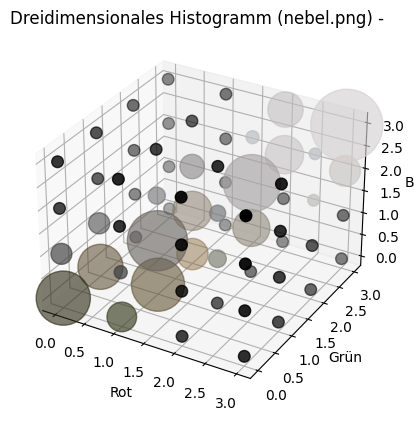

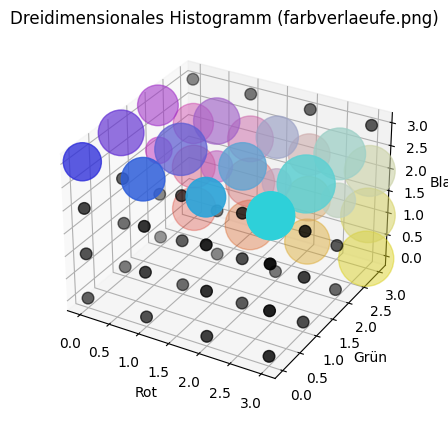

In [20]:


def calculate_3D_histogram(image):
    # Erstellen eines leeren dreidimensionalen Histogramms
    histogram_3d = np.zeros((4, 4, 4), dtype=np.int32)
    color_sum = np.zeros((4, 4, 4, 3), dtype=np.int32)

    # Iteration über alle Pixel im Bild
    for row in image:
        for pixel in row:
            red, green, blue = pixel

            # Umwandlung der Farbwerte in Indizes für das Histogramm
            red_index = int(red / 64)
            green_index = int(green / 64)
            blue_index = int(blue / 64)

            # Inkrementieren des entsprechenden Behälters im Histogramm
            histogram_3d[red_index, green_index, blue_index] += 1

            # Aggregieren der Farbwerte für Durchschnittsberechnung
            color_sum[red_index, green_index, blue_index, 0] += red
            color_sum[red_index, green_index, blue_index, 1] += green
            color_sum[red_index, green_index, blue_index, 2] += blue

    # Berechnung des Durchschnittsfarbwerts
    histogram_3d[histogram_3d == 0] = 1  # Vermeiden von Division durch 0
    avg_color = color_sum / histogram_3d[..., np.newaxis]

    return histogram_3d, avg_color

# Laden der Bilder
image1 = imread('./bilder-Wk06/nebel.png')
image2 = imread('./bilder-Wk06/farbverlaeufe.png')

# Berechnung des dreidimensionalen Histogramms für Bild 1
histogram_3d_1, avg_color_1 = calculate_3D_histogram(image1)

# Berechnung des dreidimensionalen Histogramms für Bild 2
histogram_3d_2, avg_color_2 = calculate_3D_histogram(image2)

# Plotting des dreidimensionalen Histogramms für Bild 1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.arange(4)
y = np.arange(4)
z = np.arange(4)

X, Y, Z = np.meshgrid(x, y, z)

# Berechnung der Kugelradien basierend auf der Anzahl der darin enthaltenen Pixel ###
radii = np.cbrt(histogram_3d_1.flatten()) *70

# Plotting der Kugeln
ax.scatter(X.flatten(), Y.flatten(), Z.flatten(), s=radii, c=avg_color_1.reshape(-1, 3) / 255, marker='o')

ax.set_xlabel('Rot')
ax.set_ylabel('Grün')
ax.set_zlabel('Blau')

plt.title('Dreidimensionales Histogramm (nebel.png) - ')
plt.show()

# Plotting des dreidimensionalen Histogramms für Bild 2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.arange(4)
y = np.arange(4)
z = np.arange(4)

X, Y, Z = np.meshgrid(x, y, z)

radii = np.cbrt(histogram_3d_2.flatten()) * 70

ax.scatter(X.flatten(), Y.flatten(), Z.flatten(), s=radii, c=avg_color_2.reshape(-1, 3) / 255, marker='o')

ax.set_xlabel('Rot')
ax.set_ylabel('Grün')
ax.set_zlabel('Blau')

plt.title('Dreidimensionales Histogramm (farbverlaeufe.png)')
plt.show()
